# Load Data

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/data_balita.csv")
df

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


# Exploratory Data Analyst

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [12]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [13]:
df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [14]:
duplikat = df.duplicated()
jumlah_duplikat = duplikat.sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 81574


In [15]:
df = df.drop_duplicates()
df

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120959,60,perempuan,100.700000,normal
120967,60,perempuan,113.700000,normal
120968,60,perempuan,107.500000,normal
120972,60,perempuan,127.600000,tinggi


# Analysis Distribution Data

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

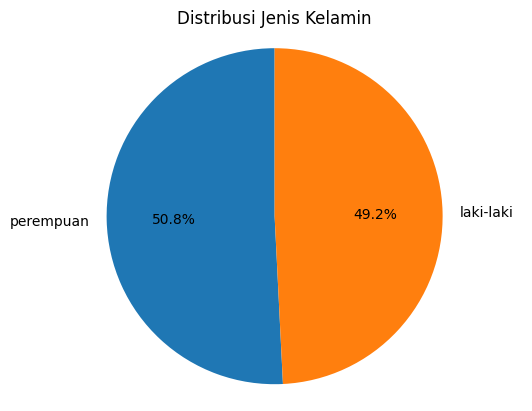

In [17]:
jml_Jkelamin = df['Jenis Kelamin'].value_counts()
plt.pie(jml_Jkelamin, labels=jml_Jkelamin.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Jenis Kelamin')
plt.axis('equal') 
plt.show()

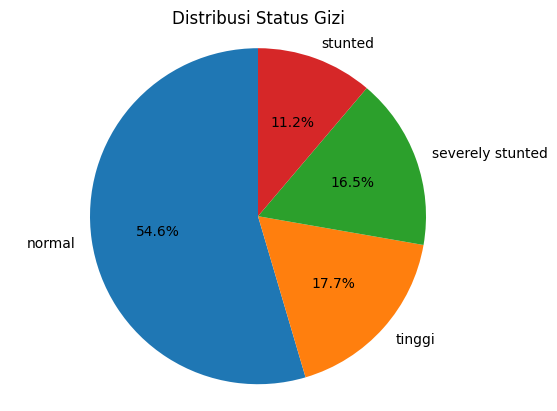

In [18]:
jml_statusgizi = df['Status Gizi'].value_counts()
plt.pie(jml_statusgizi, labels=jml_statusgizi.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Status Gizi')
plt.axis('equal')
plt.show()


# Konversi Data Kategorikal 

In [19]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_gizi = LabelEncoder()

# Encode fitur kategorikal & target sesuai training
df['Jenis Kelamin'] = le_gender.fit_transform(df['Jenis Kelamin'])
df['Status Gizi'] = le_gizi.fit_transform(df['Status Gizi'])

# Opsional: lihat mapping yang dipakai saat training (untuk referensi)
gender_mapping = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))
status_mapping = dict(zip(le_gizi.classes_, le_gizi.transform(le_gizi.classes_)))
gender_mapping, status_mapping


C:\Users\NITRO\AppData\Local\Temp\ipykernel_33268\1210205483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jenis Kelamin'] = le_gender.fit_transform(df['Jenis Kelamin'])
C:\Users\NITRO\AppData\Local\Temp\ipykernel_33268\1210205483.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status Gizi'] = le_gizi.fit_transform(df['Status Gizi'])


({'laki-laki': np.int64(0), 'perempuan': np.int64(1)},
 {'normal': np.int64(0),
  'severely stunted': np.int64(1),
  'stunted': np.int64(2),
  'tinggi': np.int64(3)})

In [20]:
gender_mapping = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))
gizi_mapping = dict(zip(le_gizi.classes_, le_gizi.transform(le_gizi.classes_)))

print("Mapping Jenis Kelamin:", gender_mapping)
print("Mapping Status Gizi:", gizi_mapping)

Mapping Jenis Kelamin: {'laki-laki': np.int64(0), 'perempuan': np.int64(1)}
Mapping Status Gizi: {'normal': np.int64(0), 'severely stunted': np.int64(1), 'stunted': np.int64(2), 'tinggi': np.int64(3)}


In [21]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,2
1,0,0,56.705203,3
2,0,0,46.863358,0
3,0,0,47.508026,0
4,0,0,42.743494,1


# Normalisasi

In [22]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

df[['Tinggi Badan (cm)', 'Umur (bulan)']] = minmax_scaler.fit_transform(df[['Tinggi Badan (cm)', 'Umur (bulan)']])
df.head()

C:\Users\NITRO\AppData\Local\Temp\ipykernel_33268\3228254475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Tinggi Badan (cm)', 'Umur (bulan)']] = minmax_scaler.fit_transform(df[['Tinggi Badan (cm)', 'Umur (bulan)']])


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0.0,0,0.052069,2
1,0.0,0,0.189736,3
2,0.0,0,0.077883,0
3,0.0,0,0.085210,0
4,0.0,0,0.031061,1


In [23]:
X = df.drop(columns=['Status Gizi'],axis=1)
y = df['Status Gizi']

In [24]:
print("Dimensi fitur dan label:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Dimensi fitur dan label:
X shape: (39425, 3)
y shape: (39425,)


In [25]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0.0,0,0.052069,2
1,0.0,0,0.189736,3
2,0.0,0,0.077883,0
3,0.0,0,0.085210,0
4,0.0,0,0.031061,1


# Train Test Split Method

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df.drop('Status Gizi', axis=1)
y = df['Status Gizi']

In [27]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Undersampling dengan Random Under Sampler
us = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = us.fit_resample(X, y)
# Menampilkan distribusi kelas setelah undersampling
print(f"Setelah Undersampling: {Counter(y_undersampled)}")
print(f"Sebelum Undersampling: {Counter(df['Status Gizi'])}")

Setelah Undersampling: Counter({0: 4417, 1: 4417, 2: 4417, 3: 4417})
Sebelum Undersampling: Counter({0: 21514, 3: 6974, 1: 6520, 2: 4417})


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_undersampled,y_undersampled,test_size=0.2,random_state=42)

# Klasifikasi Menggunakan SVM

In [29]:
from sklearn.svm import SVC
svm_model= SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred= svm_model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print("Support Vector Machine")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test, y_pred))

Support Vector Machine
Confusion Matrix:
[[673   9  97  91]
 [  0 838  63   0]
 [  0  67 822   0]
 [  0   0   0 874]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       870
           1       0.92      0.93      0.92       901
           2       0.84      0.92      0.88       889
           3       0.91      1.00      0.95       874

    accuracy                           0.91      3534
   macro avg       0.91      0.91      0.91      3534
weighted avg       0.91      0.91      0.91      3534



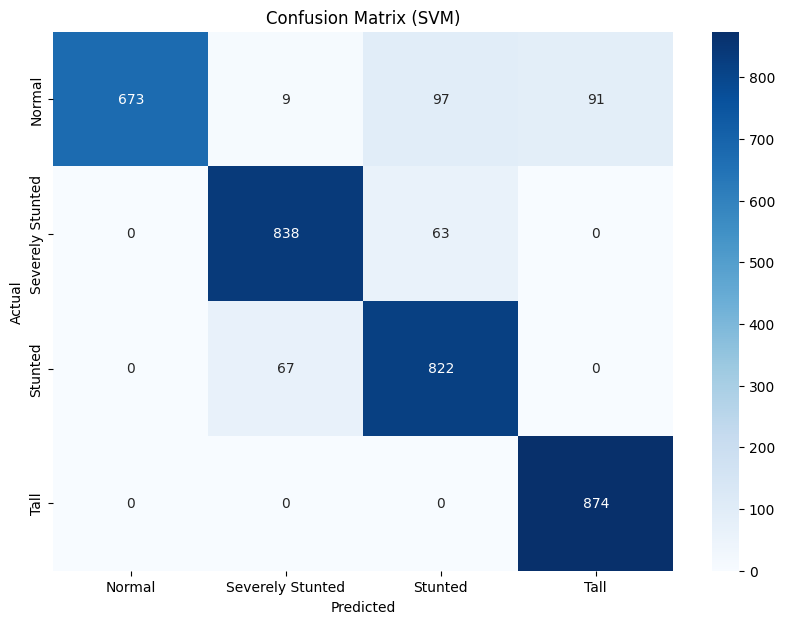

In [31]:
# Plot the confusion matrix with the correct label order
plt.figure(figsize=(10, 7))

# Generate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)

# Reordering the labels based on the correct encoded values
labels = ['Normal', 'Severely Stunted', 'Stunted', 'Tall']  # Matches the encoding: 0, 1, 2, 3

# Plot the heatmap
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Adding labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
svm_acc = accuracy_score(y_test, y_pred)
svm_prec = precision_score(y_test, y_pred, average=None)
svm_rec = recall_score(y_test, y_pred,average=None)
svm_f1 = f1_score(y_test, y_pred,average=None)
print(f'Accuracy Support Vector Machine : {svm_acc*100}')
print(f'Precision Support Vector Machine : {svm_prec}')
print(f'Recall Support Vector Machine : {svm_rec}')
print(f'F1 Support Vector Machine : {svm_f1}')

Accuracy Support Vector Machine : 90.74702886247877
Precision Support Vector Machine : [1.         0.91684902 0.83706721 0.90569948]
Recall Support Vector Machine : [0.77356322 0.93007769 0.92463442 1.        ]
F1 Support Vector Machine : [0.87232664 0.92341598 0.87867451 0.95051659]


# Cross Validation 

In [33]:
cv_scores_linear = cross_val_score(svm_model, X_train, y_train, cv=5)
print("\nCross-validation Scores Support Vector Machine :")
print(cv_scores_linear)
print(f"Mean CV Score : {cv_scores_linear.mean()}")


Cross-validation Scores Support Vector Machine :
[0.89812522 0.90166254 0.89812522 0.89954015 0.89879689]
Mean CV Score : 0.8992500033170187


# Klasifikasi Menggunakan Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

#Inisialisasi Model
dt_model = DecisionTreeClassifier(max_depth=10)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

#Prediksi Model
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Score: {acc_dt*100:.2f}%\n")

Accuracy Score: 89.39%



Classification Report for Decision Tree 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       870
           1       0.89      0.85      0.87       901
           2       0.79      0.87      0.83       889
           3       0.97      0.97      0.97       874

    accuracy                           0.89      3534
   macro avg       0.90      0.89      0.90      3534
weighted avg       0.90      0.89      0.89      3534



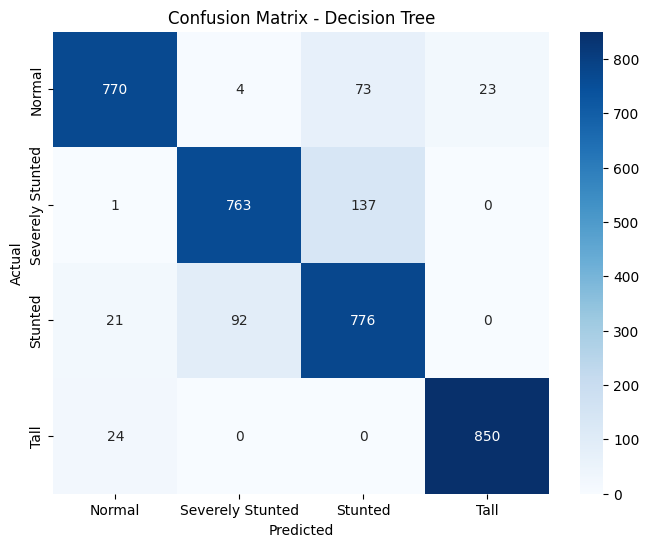

In [35]:
# Classification Report
print("Classification Report for Decision Tree ")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for DT
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Cross Validation Decision Tree

In [36]:
cv_scores_linear_dt = cross_val_score(dt_model, X_train, y_train, cv=5)
print("\nCross-validation Scores Decision Tree :")
print(cv_scores_linear_dt)
print(f"Mean CV Score : {cv_scores_linear_dt.mean()}")


Cross-validation Scores Decision Tree :
[0.88928192 0.90237    0.9122745  0.89281924 0.89171975]
Mean CV Score : 0.8976930824015014


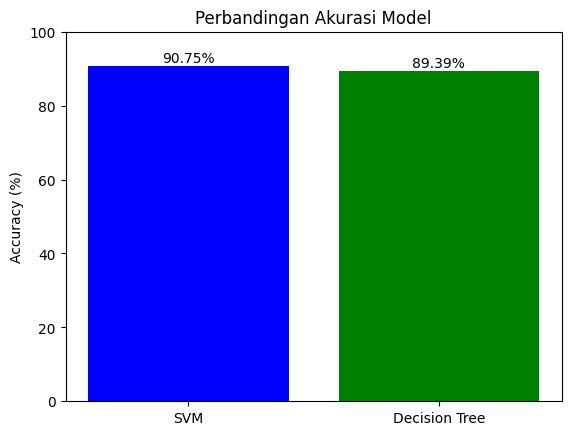

In [37]:
akurasi_svm = svm_acc * 100
akurasi_dt = acc_dt * 100

accuracies = [akurasi_svm, akurasi_dt]  # <-- Tambahkan ini

plt.bar(["SVM", "Decision Tree"], accuracies, color=["blue", "green"])
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', fontsize=10)

plt.show()

In [43]:
import pickle

# Simpan model + encoder + scaler ke satu file agar prediksi konsisten
model_bundle = {
    "model": svm_model,          # SVC yang sudah dilatih
    "encoder_gender": le_gender, # LabelEncoder untuk kolom 'Jenis Kelamin'
    "encoder_status": le_gizi,   # LabelEncoder untuk target 'Status Gizi'
    "scaler": minmax_scaler      # MinMaxScaler untuk fitur numerik
}

with open("svm_model.pkl", "wb") as f:
    pickle.dump(model_bundle, f)

print("✅ Model, encoder, dan scaler disimpan ke 'svm_model.pkl'")


✅ Model, encoder, dan scaler disimpan ke 'svm_model.pkl'


In [42]:
import pickle
import pandas as pd
import numpy as np

# === UJI CEPAT DENGAN DATAFRAME ===
# 1) Load bundle
with open("svm_model.pkl", "rb") as f:
    bundle = pickle.load(f)

model = bundle["model"]
encoder_gender = bundle["encoder_gender"]
encoder_status = bundle["encoder_status"]
scaler = bundle["scaler"]

# 2) Buat DataFrame uji (silakan ubah nilainya untuk mengetes)
df_test = pd.DataFrame({
    "Umur (bulan)": [47, 47, 36],
    "Jenis Kelamin": ["laki-laki", "perempuan", "laki-laki"],
    "Tinggi Badan (cm)": [101.4, 87.0, 95.0]
})

# 3) Samakan format label 'Jenis Kelamin' dengan encoder training (hindari unseen labels)
# Normalisasi sederhana: strip + lowercase -> sesuaikan kelas encoder ke lowercase juga
df_test["Jenis Kelamin"] = df_test["Jenis Kelamin"].astype(str).str.strip()
enc_classes = list(encoder_gender.classes_)
# Jika kelas encoder tampak berbeda kapitalisasi, tetap gunakan transform langsung;
# pastikan nilai di df_test cocok persis dengan kelas encoder.
# Kalau perlu, tampilkan kelas yang tersedia:
print("Kelas Jenis Kelamin di encoder:", enc_classes)

# 4) Transform fitur kategorikal sesuai encoder training
df_test["Jenis Kelamin"] = encoder_gender.transform(df_test["Jenis Kelamin"])

# 5) Susun fitur dengan NAMA KOLOM yang SAMA seperti training
X_new = df_test[["Umur (bulan)", "Jenis Kelamin", "Tinggi Badan (cm)"]]

# 6) Scale fitur numerik menggunakan scaler training
# Catatan: saat training, kita men-scale dua kolom numerik langsung di dataframe (MinMaxScaler fit di df).
# Karena itu, untuk konsistensi, kita panggil scaler.transform ke subset kolom numerik dan re-assign.
num_cols = ["Tinggi Badan (cm)", "Umur (bulan)"]
X_new_scaled = X_new.copy()
X_new_scaled[num_cols] = scaler.transform(X_new_scaled[num_cols])

# 7) Prediksi
y_pred_enc = model.predict(X_new_scaled)

# 8) Decode label ke bentuk aslinya
y_pred = encoder_status.inverse_transform(y_pred_enc)

# 9) Tampilkan hasil
df_out = X_new.copy()
df_out["Prediksi Status Gizi"] = y_pred
print(df_out)


Kelas Jenis Kelamin di encoder: ['laki-laki', 'perempuan']
   Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm) Prediksi Status Gizi
0            47              0              101.4               normal
1            47              1               87.0     severely stunted
2            36              0               95.0               normal


In [ ]:
import pickle

with open("model_pipeline.pkl", "wb") as f:
    pickle.dump((svm_model, le_gender, scaler), f)


> **Catatan Perbaikan Penting**
>
> 1. **Scaler disimpan**: MinMaxScaler dari training sekarang ikut disimpan di `svm_model.pkl` dan **wajib** dipakai saat prediksi.
> 2. **Nama kolom konsisten**: Prediksi menggunakan kolom persis seperti saat training — `['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)']`. Jangan ganti jadi `Jenis Kelamin Encode`.
> 3. **Encoder yang sama**: Kolom `Jenis Kelamin` di data uji di-transform memakai `encoder_gender` dari training; hasilnya **tetap disimpan di kolom yang sama** supaya nama kolom cocok dengan model.
> 4. Jika hasil masih satu kelas terus, cek distribusi label `df['Status Gizi'].value_counts()` dan pertimbangkan `class_weight='balanced'` pada SVC.
